# 25.01.20

**Author:** Miron Rogovets

---

## Group tasks

**Task 1.** Open *data_games.dta* file. Do the frequency analysis of payment_method variable and answer the questions below:

* How many payments were done using a giftcard?   **58**
* What is the percent of payments, which were done using fb_promotion?   **498**
* What is the percent of payments, which were done using a giftcard?   **0.05**

#### Solution:

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import norm

In [105]:
df = pd.read_stata('data/data_games.dta')
df.head(10)

,id,pack_id,crystalls_balance_before_buy,crystalls_bought,country,payment,utc_timestamp,payment_type,payment_method
0,2.052791e+09,3.0,0.0,41.0,GB,644.0,1.414842e+09,offer,general
1,1.275033e+09,1.0,10.0,7.0,US,205.0,1.414814e+09,offer,general
2,2.000015e+14,2.0,2.0,14.0,US,514.0,1.414866e+09,regular,general
3,1.119068e+09,4.0,0.0,70.0,GB,1289.0,1.414917e+09,regular,general
4,2.000028e+14,3.0,0.0,30.0,US,1029.0,1.414946e+09,regular,general
5,1.656877e+09,1.0,0.0,5.0,US,205.0,1.415036e+09,regular,general
6,2.000128e+14,4.0,7.0,70.0,US,2058.0,1.415114e+09,regular,general
7,1.326672e+09,6.0,0.0,210.0,GB,3225.0,1.415110e+09,regular,general
8,2.428350e+09,6.0,3.0,210.0,US,5147.0,1.415217e+09,regular,general
9,2.000074e+14,5.0,1.0,120.0,FR,3087.0,1.415191e+09,regular,general


In [106]:
df['payment_method'].value_counts()

general         103278
mobile            1673
fb_promotion       498
giftcard            58
Name: payment_method, dtype: int64

In [107]:
df['payment_method'].value_counts(normalize=True)

general         0.978873
mobile          0.015857
fb_promotion    0.004720
giftcard        0.000550
Name: payment_method, dtype: float64

**Task 2.** Open *data_games.dta* file. Indicate the following statistical characteristics for **crystalls_bought** variable:

* Mode: **14.0**
* Median: **30.0**
* Mean: **51.363379**
* Range: **\[0.0, 1695.0\]**
* Standard deviation: **75.606944**
* S. E. mean: **0.2328**
* Interquartile range: **56.0**
* Quartile deviation: **28.0**
* Decile ratio: **24.0**

#### Solution:

In [113]:
# Mode
df['crystalls_bought'].mode()

0    14.0
dtype: float64

In [114]:
# Median
df['crystalls_bought'].median()

30.0

In [115]:
df['crystalls_bought'].describe()

count    105507.000000
mean         51.363379
std          75.606944
min           0.000000
25%          14.000000
50%          30.000000
75%          70.000000
max        1695.000000
Name: crystalls_bought, dtype: float64

In [116]:
# S. E. Mean
df['crystalls_bought'].sem()

0.23276680517884346

In [24]:
data = df['crystalls_bought'].values

In [112]:
# Interquartile range
IQR = stats.iqr(data, interpolation = 'midpoint')
IQR

56.0

In [28]:
# Quartile deviation
IQR/2

28.0

In [118]:
# Decile ratio
deciles = np.percentile(data, np.arange(0, 100, 10))
deciles[9]/deciles[1]

24.0

Crate a histogram for *crystalls_bought* variable with normal density plot

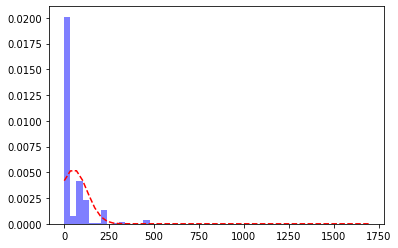

In [119]:
num_bins = 50
n, bins, patches = plt.hist(data, num_bins, facecolor='blue', alpha=0.5, density=1)
y = norm.pdf(bins, data.mean(), data.std())
plt.plot(bins, y, 'r--')
plt.show()

**Task 3.** Open *data_games.dta* file.

Evaluate the symmetry and pointyness of distribution of *payment* variable. Indicate whether the distribution is positively or negatively skewed and what does it mean in terms of the shape of the distribution. Indicate whether the distribution is leptokurtic or platykurtic and what does it mean in terms of the shape of the distribution.

#### Solution:

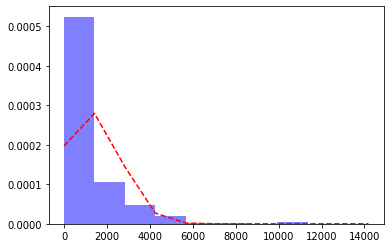

In [120]:
n, bins, patches = plt.hist(df['payment'], facecolor='blue', alpha=0.5, density=1)
y = norm.pdf(bins, df['payment'].mean(), df['payment'].std())
plt.plot(bins, y, 'r--')
plt.show()

In [121]:
# Skewness
skew(df['payment'])

3.1151223650307416

In [122]:
# Kurtosis
kurtosis(df['payment'])

14.196400203799207

---

## Individual tasks

*note: commands for tasks 1-3 are written for Stata command line*

**Task 1.** What should be written in the command line to create an “age” variable with represents the age of a person in years?

**Solution:** <code>generate int age = 0</code>

**Task 2.** What should be written in the command line to rename the variable “q1” to “gender”?

**Solution:** <code>rename q1 gender</code>

**Task 3.** What should be written in the command line to give to the “age” variable the label “Age in years”?

**Solution:** <code>label variable age "Age in years"</code>

**Task 4.** Open *nlsw88.dta* file (from Example Datasets)

In [123]:
nlsw88 = pd.read_stata('data/nlsw88.dta')
nlsw88.head(5)

,idcode,age,race,married,never_married,grade,collgrad,south,smsa,c_city,industry,occupation,union,wage,hours,ttl_exp,tenure
0,1,37,black,single,0,12.0,not college grad,0,SMSA,0,Transport/Comm/Utility,Operatives,union,11.739125,48.0,10.333334,5.333333
1,2,37,black,single,0,12.0,not college grad,0,SMSA,1,Manufacturing,Craftsmen,union,6.400963,40.0,13.621795,5.250000
2,3,42,black,single,1,12.0,not college grad,0,SMSA,1,Manufacturing,Sales,NaN,5.016723,40.0,17.730770,1.250000
3,4,43,white,married,0,17.0,college grad,0,SMSA,0,Professional Services,Other,union,9.033813,42.0,13.211537,1.750000
4,6,42,white,married,0,12.0,not college grad,0,SMSA,0,Manufacturing,Operatives,nonunion,8.083731,48.0,17.820513,17.750000


**a.** How many unique value labels the file contains? **17**

In [127]:
nlsw88.columns.shape

(17,)

**b.** Analyse *occupation* variable and answer the questions below:

- How many Managers/admins participated in the research? **264**
- What in the percent of Professional/technical out of all the research participants? **14.17**
- What in the percent of Professional/technical out of the research participants that gave valid information about their occupation? **14.11**

**Solution:**

In [136]:
nlsw88['occupation'].value_counts()

Sales                     726
Professional/technical    317
Laborers                  286
Managers/admin            264
Operatives                246
Other                     187
Clerical/unskilled        102
Craftsmen                  53
Transport                  28
Service                    16
Farm laborers               9
Household workers           2
Farmers                     1
Name: occupation, dtype: int64

In [130]:
nlsw88['occupation'].value_counts(normalize=1)

Sales                     0.324542
Professional/technical    0.141708
Laborers                  0.127850
Managers/admin            0.118015
Operatives                0.109969
Other                     0.083594
Clerical/unskilled        0.045597
Craftsmen                 0.023692
Transport                 0.012517
Service                   0.007152
Farm laborers             0.004023
Household workers         0.000894
Farmers                   0.000447
Name: occupation, dtype: float64

In [139]:
nlsw88['occupation'].value_counts(normalize=1, dropna=0)

Sales                     0.323241
Professional/technical    0.141140
Laborers                  0.127337
Managers/admin            0.117542
Operatives                0.109528
Other                     0.083259
Clerical/unskilled        0.045414
Craftsmen                 0.023598
Transport                 0.012467
Service                   0.007124
NaN                       0.004007
Farm laborers             0.004007
Household workers         0.000890
Farmers                   0.000445
Name: occupation, dtype: float64

**c.** Indicate the following statistical characteristics for *age* variable:

* Mode: **35**
* Median: **39.0**
* Mean: **39.153**
* Range: **\[34.0, 46.0\]**
* Standard deviation: **3.06**
* S. E. mean: **0.0646**
* Interquartile range: **6.0**
* Quartile deviation: **3.0**
* Decile ratio: **1.257**

**Solution:**

In [152]:
nlsw88['age'].mode()

0    35
dtype: int8

In [154]:
nlsw88['age'].median()

39.0

In [155]:
nlsw88['age'].describe()

count    2246.000000
mean       39.153161
std         3.060002
min        34.000000
25%        36.000000
50%        39.000000
75%        42.000000
max        46.000000
Name: age, dtype: float64

In [156]:
nlsw88['age'].sem()

0.06456793039919936

In [158]:
age_data = nlsw88['age'].values
iqr = stats.iqr(age_data, interpolation = 'midpoint')
iqr

6.0

In [159]:
iqr/2

3.0

In [160]:
dec = np.percentile(age_data, np.arange(0, 100, 10))
dec[9]/dec[1]

1.2571428571428571

Evaluate the symmetry and pointyness of distribution of *age* variable. Indicate whether the distribution is positively or negatively skewed and what does it mean in terms of the shape of the distribution. Indicate whether the distribution is leptokurtic or platykurtic and what does it mean in terms of the shape of the distribution.

**Solution:**

In [161]:
skew(age_data)

0.20032335378060623

In [162]:
kurtosis(age_data)

-1.0676109132092788

The distribution is positivly skewed and platykurtic.

Crate a histogram for *age* variable with normal density plot

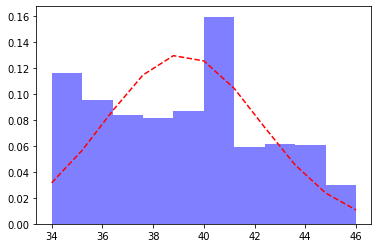

In [163]:
n, bins, patches = plt.hist(age_data, facecolor='blue', alpha=0.5, density=1)
y = norm.pdf(bins, age_data.mean(), age_data.std())
plt.plot(bins, y, 'r--')
plt.show()

**d.** Indicate the mean age for those who are married and not married.

In [173]:
single = nlsw88['married'] == 'single'
married = nlsw88['married'] == 'married'

In [180]:
nlsw88[single]['age'].mean()

39.21890547263681

In [181]:
nlsw88[married]['age'].mean()

39.116504854368934

*39 years* is the mean age for both married and single people in observation

**e.** Indicate the maximum age of those who are not married and have the tenure variable greater than 5.0.

In [202]:
tenure = nlsw88['tenure'] > 5.0
nlsw88[single & tenure]['age'].max()

46

**f.** How many college graduates are marries, what is the percent of college graduates that are marries?

In [211]:
nlsw88['collgrad'].values.unique()

[not college grad, college grad]
Categories (2, object): [not college grad < college grad]

In [221]:
graduated = nlsw88['collgrad'] == 'college grad'
nlsw88[graduated]['married'].value_counts()

married    344
single     188
Name: married, dtype: int64

In [222]:
nlsw88[graduated]['married'].value_counts(normalize=1)

married    0.646617
single     0.353383
Name: married, dtype: float64

**g.** How many research participants have the following characteristics:
- are not marries,
- are not college graduates,
- are not members of the union. 

What is the mean age and the standard deviation of age for this group of people?

**Solution:**

In [230]:
nonunion = nlsw88['union'] == 'nonunion'
nlsw88[single & ~graduated & nonunion]['age'].describe()

count    361.000000
mean      39.340720
std        3.030902
min       34.000000
25%       37.000000
50%       39.000000
75%       42.000000
max       46.000000
Name: age, dtype: float64